# Analyzing Web Logs of Web Development and Data Science Curriculum
Using Time Series Analysis to Determine 
- Anomalies in User Curriculumn Access
- General Trends in User Curriculumn Access

### Table of Contents<a class="anchor" id="top-bullet"></a>
- [Which lesson appears to attract the most traffic consistently across cohorts (per program)?](#first-bullet)
- [Is there a cohort that referred to a lesson significantly more that other cohorts seemed to gloss over?](#second-bullet)
- [Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?](#third-bullet)
- [Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses? Any odd user-agents?](#fourth-bullet)
- [At some point in the last year, ability for students and alumni to cross-access curriculum (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?](#fifth-bullet)
- [What topics are grads continuing to reference after graduation and into their jobs (for each program)?](#sixth-bullet)
- [Which lessons are least accessed?](#seventh-bullet)
- [Final Conclusions](#eight-bullet)

### Reference for Cohort Id's
| cohort_id | name       | start_date | end_date   | program_id |
|-----------|------------|------------|------------|------------|
| 1         | Arches     | 2014-02-04 | 2014-04-22 | 1          |
| 2         | Badlands   | 2014-06-04 | 2014-08-22 | 1          |
| 3         | Carlsbad   | 2014-09-04 | 2014-11-05 | 1          |
| 4         | Denali     | 2014-10-20 | 2015-01-18 | 1          |
| 5         | Everglades | 2014-11-18 | 2015-02-24 | 1          |
| 6         | Franklin   | 2015-02-03 | 2015-05-26 | 1          |
| 7         | Glacier    | 2015-06-05 | 2015-10-06 | 1          |
| 8         | Hampton    | 2015-09-22 | 2016-02-06 | 1          |
| 9         | Apollo     | 2015-03-30 | 2015-07-29 | 4          |
| 10        | Balboa     | 2015-11-03 | 2016-03-11 | 4          |
| 11        | Ike        | 2016-01-20 | 2016-05-12 | 1          |
| 12        | Joshua     | 2016-03-08 | 2016-06-30 | 1          |
| 13        | Kings      | 2016-05-23 | 2016-09-15 | 1          |
| 14        | Lassen     | 2016-07-18 | 2016-11-10 | 1          |
| 15        | Mammoth    | 2016-09-26 | 2017-02-02 | 2          |
| 16        | Niagara    | 2016-10-26 | 2017-03-09 | 2          |
| 17        | Olympic    | 2017-02-06 | 2017-05-25 | 1          |
| 18        | Pinnacles  | 2017-03-27 | 2017-07-20 | 2          |
| 19        | Quincy     | 2017-06-05 | 2017-09-22 | 1          |
| 20        | Redwood    | 2017-07-31 | 2017-12-06 | 2          |
| 21        | Sequoia    | 2017-09-27 | 2018-02-15 | 2          |
| 22        | Teddy      | 2018-01-08 | 2018-05-17 | 2          |
| 23        | Ulysses    | 2018-03-05 | 2018-07-19 | 2          |
| 24        | Voyageurs  | 2018-05-29 | 2018-10-11 | 2          |
| 25        | Wrangell   | 2018-07-23 | 2018-11-29 | 2          |
| 26        | Xanadu     | 2018-09-17 | 2019-02-08 | 2          |
| 27        | Yosemite   | 2018-11-05 | 2019-04-03 | 2          |
| 28        | Staff      | 2014-02-04 | 2014-02-04 | 2          |
| 29        | Zion       | 2019-01-22 | 2019-06-04 | 2          |
| 30        | Ada        | 2019-02-04 | 2019-06-16 | 3          |
| 31        | Andromeda  | 2019-03-18 | 2019-07-30 | 2          |
| 32        | Betelgeuse | 2019-05-28 | 2019-10-08 | 2          |
| 33        | Ceres      | 2019-07-15 | 2019-12-11 | 2          |
| 34        | Bayes      | 2019-08-19 | 2020-01-30 | 3          |
| 51        | Deimos     | 2019-09-16 | 2020-02-27 | 2          |
| 52        | Europa     | 2019-11-04 | 2020-04-17 | 2          |
| 53        | Fortuna    | 2020-01-13 | 2020-06-23 | 2          |
| 55        | Curie      | 2020-02-03 | 2020-07-07 | 3          |
| 56        | Apex       | 2020-02-24 | 2020-07-29 | 2          |
| 57        | Ganymede   | 2020-03-23 | 2020-08-20 | 2          |
| 58        | Hyperion   | 2020-05-26 | 2020-11-10 | 2          |
| 59        | Darden     | 2020-07-13 | 2021-01-12 | 3          |
| 60        | Io         | 2020-07-20 | 2021-01-21 | 2          |
| 61        | Bash       | 2020-07-20 | 2021-01-21 | 2          |
| 62        | Jupiter    | 2020-09-21 | 2021-03-30 | 2          |
| 132       | Kalypso    | 2020-11-02 | 2021-05-04 | 2          |
| 0         | Unknown    |            |            |            |

# Data Acquired with Wrangle.py Module
- will need the txt file downloaded in working directory
    - anonymized-curriculum-access.txt
- reads txt file, renames columns, sets date to index, and returns the cleaned df

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import Wrangle

In [2]:
df = Wrangle.acquire_logs()

In [3]:
df

,page_viewed,user_id,cohort_id,ip,ip_int
2018-01-26 09:56:02,java-ii,1,8,97.105.19.61,971051961
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,971051961
2018-01-26 09:56:06,slides/object_oriented_programming,1,8,97.105.19.61,971051961
2018-01-26 09:56:24,javascript-i/conditionals,2,22,97.105.19.61,971051961
2018-01-26 09:56:41,javascript-i/loops,2,22,97.105.19.61,971051961
...,...,...,...,...,...
2020-11-02 16:48:13,javascript-i/coffee-project,763,62,107.192.148.199,107192148199
2020-11-02 16:48:17,javascript-i/mapbox-api,771,62,172.125.226.175,172125226175
2020-11-02 16:48:18,javascript-i/coffee-project,771,62,172.125.226.175,172125226175
2020-11-02 16:48:28,javascript-i/bom-and-dom/bom,771,62,172.125.226.175,172125226175


In [4]:
# creating a dataframe of only Data Science Cohorts, any cohort with program id of 3
DS_df = df[(df.cohort_id == 30) | (df.cohort_id == 34) | (df.cohort_id == 55) | (df.cohort_id == 59)]

In [5]:
DS_df.cohort_id.value_counts()

34    19416
59    17323
55    15534
Name: cohort_id, dtype: int64

In [6]:
# creating a dataframe of only Web Dev Cohorts, any cohort not DS or Staff
WD_df = df[(df.cohort_id != 28) & (df.cohort_id != 30) & (df.cohort_id != 34) & (df.cohort_id != 55) & (df.cohort_id != 59) & (df.cohort_id != 0)]

In [7]:
WD_df.cohort_id.value_counts()

33    34596
29    32289
24    31127
53    30281
57    26954
56    26192
22    26035
51    25935
32    25289
23    24767
26    24645
58    24199
52    23434
31    22172
25    21936
27    17655
61     9996
14     8835
1      7668
62     6873
21     5978
17     4519
13     2399
18     1747
8      1301
19      915
16      639
15      599
7       424
12      271
11      184
2        74
6        65
9         4
4         2
Name: cohort_id, dtype: int64

##### [Back to Table of Contents](#top-bullet)

# Questions Directly Asked

## Which lesson appears to attract the most traffic consistently across cohorts (per program)? <a class="anchor" id="first-bullet"></a>

In [8]:
# top 5 overall pages
print('5 Most Popular Pages in Web Dev Program')
WD_df.page_viewed.value_counts().head(5)

5 Most Popular Pages in Web Dev Program


javascript-i    12639
java-iii         9702
html-css         9386
java-ii          9072
spring           8785
Name: page_viewed, dtype: int64

Text(0, 0.5, 'Count of Page Visits')

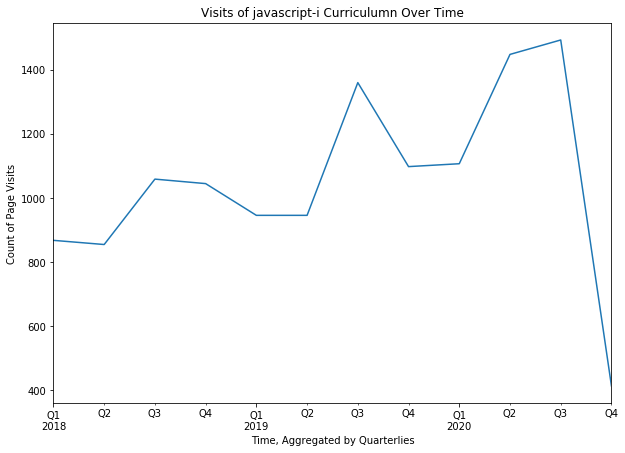

In [9]:
# plotting most popular page visits over time
plt.figure(figsize=(10,7))
WD_df[WD_df.page_viewed == 'javascript-i'].page_viewed.resample('Q').count().plot()
plt.title('Visits of javascript-i Curriculumn Over Time')
plt.xlabel('Time, Aggregated by Quarterlies')
plt.ylabel('Count of Page Visits')

5 Most Popular Pages in Web Dev Cohort 56
html-css        708
java-iii        616
javascript-i    610
java-ii         595
spring          572
Name: page_viewed, dtype: int64




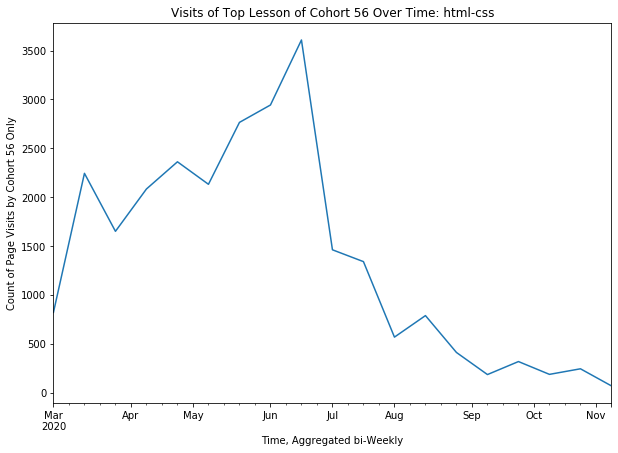




5 Most Popular Pages in Web Dev Cohort 57
javascript-i     694
java-iii         620
java-ii          607
jquery           496
javascript-ii    483
Name: page_viewed, dtype: int64




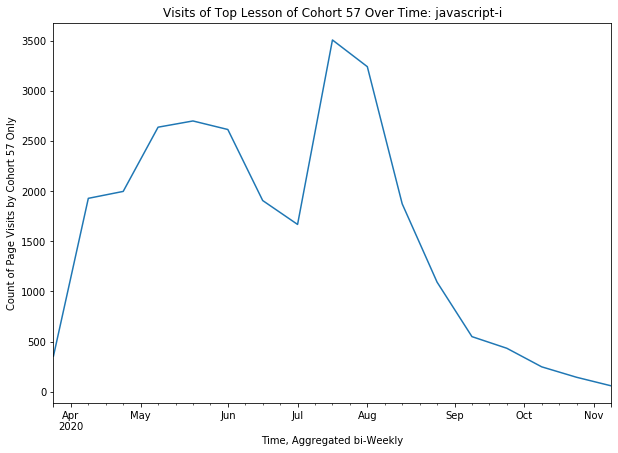




5 Most Popular Pages in Web Dev Cohort 58
javascript-i    884
java-iii        651
java-ii         632
mysql           517
jquery          490
Name: page_viewed, dtype: int64




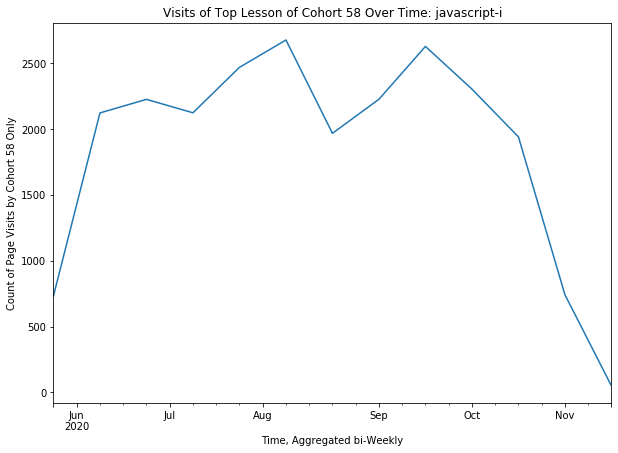

In [144]:
# looking at 3 recent cohorts
WD_cohorts = [56,57,58]

for x in WD_cohorts:
    
    # top 5 overall pages
    print('5 Most Popular Pages in Web Dev Cohort',x)
    print(WD_df[WD_df.cohort_id == x].page_viewed.value_counts().head())
    print('\n')
    
    top_page = WD_df[WD_df.cohort_id == x].page_viewed.value_counts().head().idxmax()
    
    plt.figure(figsize=(10,7))
    WD_df[WD_df.cohort_id == x].page_viewed.resample('2W').count().plot()
    plt.title(f'Visits of Top Lesson of Cohort {x} Over Time: {top_page}')
    plt.xlabel('Time, Aggregated bi-Weekly')
    plt.ylabel(f'Count of Page Visits by Cohort {x} Only')
    plt.show()
    print('\n\n')

In [131]:
# top 5 overall pages
print('5 Most Popular Pages in Data Science Program')
DS_df.page_viewed.value_counts().head()

5 Most Popular Pages in Data Science Program


1-fundamentals/1.1-intro-to-data-science    1536
6-regression/1-overview                     1123
classification/overview                      860
10-anomaly-detection/1-overview              742
3-sql/1-mysql-overview                       704
Name: page_viewed, dtype: int64

Text(470, 410, 'Darden Begins')

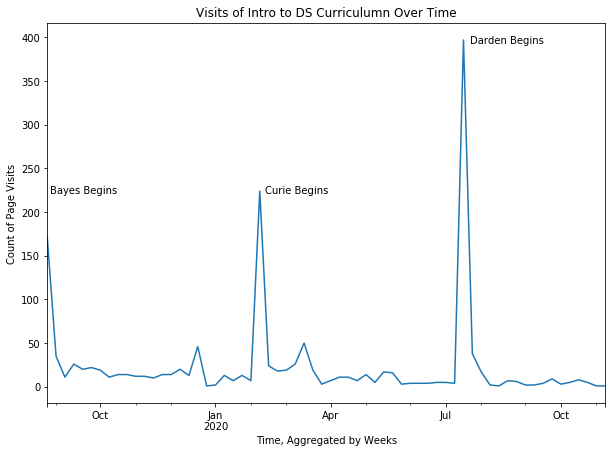

In [53]:
# plotting most popular page visits over time
plt.figure(figsize=(10,7))
DS_df[DS_df.page_viewed == '1-fundamentals/1.1-intro-to-data-science'].page_viewed.resample('W').count().plot()
plt.title('Visits of Intro to DS Curriculumn Over Time')
plt.xlabel('Time, Aggregated by Weeks')
plt.ylabel('Count of Page Visits')

plt.annotate('Bayes Begins',
            xy=(50, 260), xycoords='figure pixels')

plt.annotate('Curie Begins',
            xy=(265, 260), xycoords='figure pixels')

plt.annotate('Darden Begins',
            xy=(470, 410), xycoords='figure pixels')

Text(0, 0.5, 'Count of Page Visits')

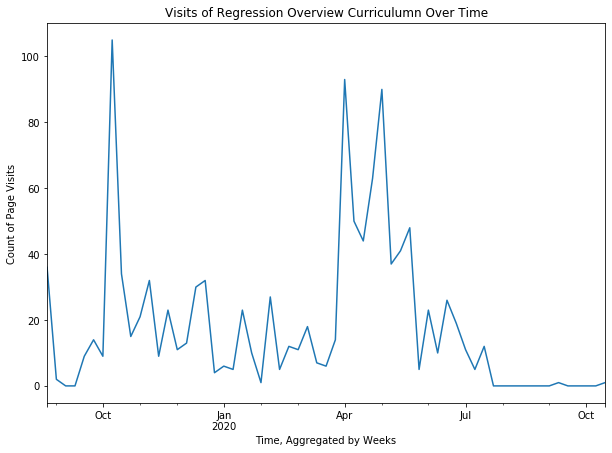

In [54]:
# plotting second most popular page visits over time
plt.figure(figsize=(10,7))
DS_df[DS_df.page_viewed == '6-regression/1-overview'].page_viewed.resample('W').count().plot()
plt.title('Visits of Regression Overview Curriculumn Over Time')
plt.xlabel('Time, Aggregated by Weeks')
plt.ylabel('Count of Page Visits')

5 Most Popular Pages in Data Science Cohort 34
1-fundamentals/1.1-intro-to-data-science    615
6-regression/1-overview                     521
10-anomaly-detection/1-overview             383
6-regression/5.0-evaluate                   333
5-stats/3-probability-distributions         320
Name: page_viewed, dtype: int64




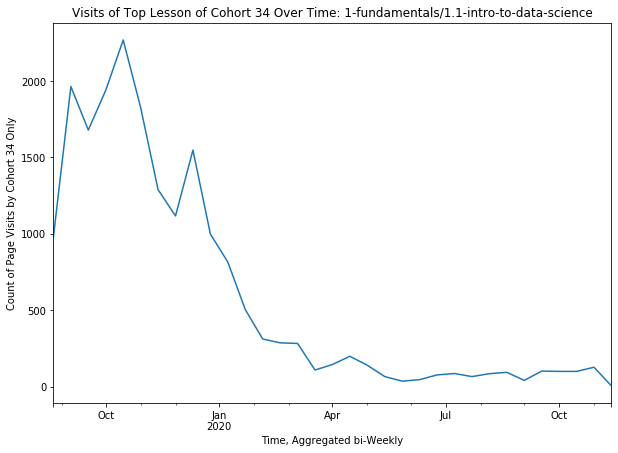




5 Most Popular Pages in Data Science Cohort 55
6-regression/1-overview                     595
1-fundamentals/1.1-intro-to-data-science    461
3-sql/1-mysql-overview                      441
10-anomaly-detection/1-overview             345
4-python/8.4.3-dataframes                   260
Name: page_viewed, dtype: int64




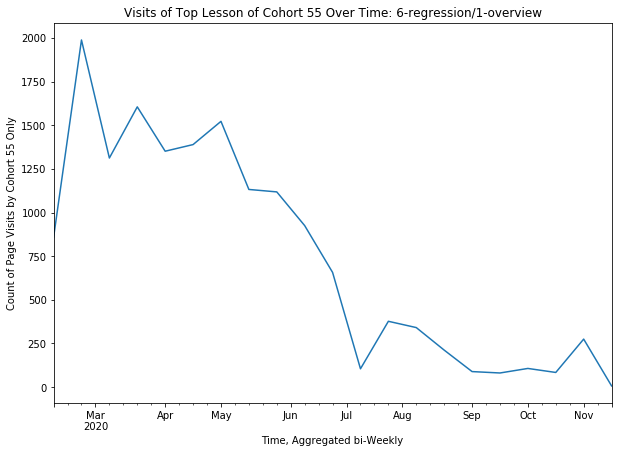




5 Most Popular Pages in Data Science Cohort 59
classification/overview                     759
classification/scale_features_or_not.svg    590
sql/mysql-overview                          513
1-fundamentals/1.1-intro-to-data-science    460
stats/compare-means                         338
Name: page_viewed, dtype: int64




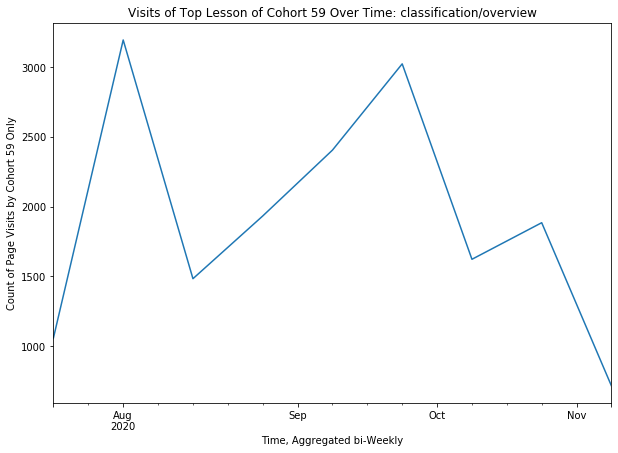

In [142]:
# not including 30, no values
DS_cohorts = [34,55,59]

for x in DS_cohorts:
    
    # top 5 overall pages
    print('5 Most Popular Pages in Data Science Cohort',x)
    print(DS_df[DS_df.cohort_id == x].page_viewed.value_counts().head())
    print('\n')
    
    top_page = DS_df[DS_df.cohort_id == x].page_viewed.value_counts().head().idxmax()
    
    plt.figure(figsize=(10,7))
    DS_df[DS_df.cohort_id == x].page_viewed.resample('2W').count().plot()
    plt.title(f'Visits of Top Lesson of Cohort {x} Over Time: {top_page}')
    plt.xlabel('Time, Aggregated bi-Weekly')
    plt.ylabel(f'Count of Page Visits by Cohort {x} Only')
    plt.show()
    print('\n\n')

## Takeaways
- For web development, javascript-i is the most visited curriculum page. This is consistent over time, which could be due to the more frequent amount of cohorts.  
- For data science, the intro curriculum is the most visited page. The use of the page peaks at the beginning of each cohort, and is used less consistently over time. The second most popular curriculumn page is the Regression Overview, which has a more consistent use.  

### Next Steps
- Analyze the consistency of page visits on additional pages. Are there less popular pages that are more consistently visited though smaller amounts?

##### [Back to Table of Contents](#top-bullet)

## Is there a cohort that referred to a lesson significantly more that other cohorts seemed to gloss over? <a class="anchor" id="second-bullet"></a>

### Data Science Cohorts

In [13]:
pd.DataFrame(DS_df.page_viewed.value_counts().head(5)).index

Index(['1-fundamentals/1.1-intro-to-data-science', '6-regression/1-overview',
       'classification/overview', '10-anomaly-detection/1-overview',
       '3-sql/1-mysql-overview'],
      dtype='object')

In [14]:
popular_DS = DS_df[(DS_df.page_viewed == '1-fundamentals/1.1-intro-to-data-science') | (DS_df.page_viewed == '6-regression/1-overview') | (DS_df.page_viewed == 'classification/overview') | (DS_df.page_viewed == '10-anomaly-detection/1-overview') | (DS_df.page_viewed == '3-sql/1-mysql-overview')]

In [15]:
popular_DS = pd.crosstab(popular_DS.cohort_id, popular_DS.page_viewed)

In [16]:
popular_DS.columns = ['Fundamentals_Intro','Anomaly_Overview','MySQL_Overview','Regression_Overview','Classification_Overview']

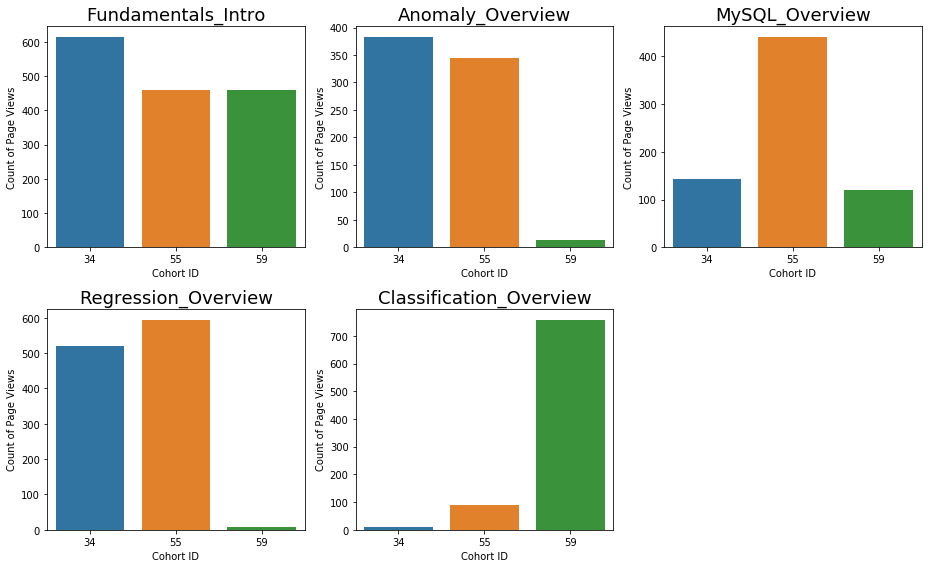

In [17]:
x = 1
plt.figure(figsize=(13,8))
for col in popular_DS.columns:
    plt.subplot(2,3,x)
    x = x + 1
    sns.barplot(x=popular_DS.index, y=popular_DS[col])
    plt.title(col, fontsize=18)
    plt.xlabel("Cohort ID")
    plt.ylabel("Count of Page Views")
    
plt.tight_layout()

### Web Dev Cohorts

In [18]:
pd.DataFrame(WD_df.page_viewed.value_counts().head(5)).index

Index(['javascript-i', 'java-iii', 'html-css', 'java-ii', 'spring'], dtype='object')

In [19]:
popular_WD = WD_df[(WD_df.page_viewed == 'javascript-i') | (WD_df.page_viewed == 'java-iii') | (WD_df.page_viewed == 'html-css') | (WD_df.page_viewed == 'java-ii') | (WD_df.page_viewed == 'spring')]

In [20]:
popular_WD = pd.crosstab(popular_WD.cohort_id, popular_WD.page_viewed)

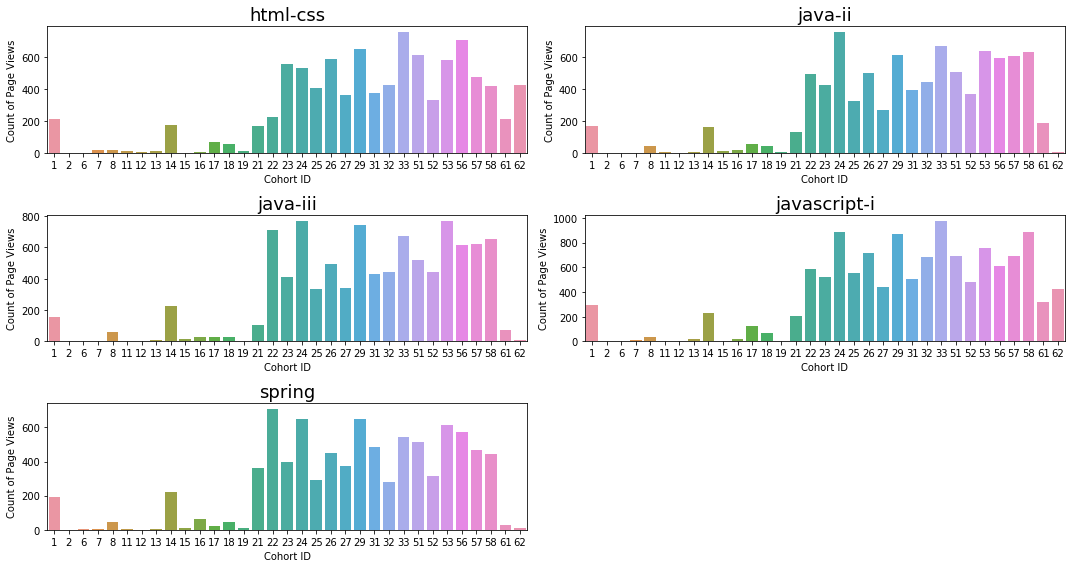

In [21]:
x = 1
plt.figure(figsize=(15,8))

for col in popular_WD.columns:
    plt.subplot(3,2,x)
    x = x + 1
    sns.barplot(x=popular_WD.index, y=popular_WD[col])
    plt.title(col, fontsize=18)
    plt.xlabel("Cohort ID")
    plt.ylabel("Count of Page Views")
    
plt.tight_layout()

### Takeaways
Data Science:  
- Darden spent the most time on Classification
- Curie spent more time on MySql
- Bayes and Curie spent more time on Regression and Anomaly  

Web Development:  
- Similar Cohorts spend more time on the same curriculum pages as opposed to less active cohorts  

### Next Steps  

Analyze more curriculum pages in addition to the more popular ones.

##### [Back to Table of Contents](#top-bullet)

# Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students? <a class="anchor" id="third-bullet"></a>
- active cohort id's == 58, 59, 60, 61

In [22]:
active_df = df[(df.cohort_id == 58) | (df.cohort_id == 59) | (df.cohort_id == 60) | (df.cohort_id == 61)]

In [23]:
pd.DataFrame(active_df.groupby('user_id')['page_viewed'].count()).sort_values("page_viewed").head(10)

,page_viewed
user_id,
679,4
697,7
785,28
780,41
783,50
784,65
702,76
734,78
781,79


### Least Active Student User Id's
Note: Top 5 from cohort 59. 
- 679, 24.28.146.155, 2 days at start of program
    - user_id 698 has same ip
- 697, 136.50.70.27, 1 day at start of program
    - user_id 699 has same ip
- 785, 72.181.127.233, from 10/26 to 11/02
    - user_id 689 has same ip
- 780, 99.132.128.255, from 10/22 to 11/02
    - user_id 687 has same ip
- 783, 70.120.16.59, from 10/25 to 11/02
    - user_id 684 has same ip
- 702, 76.221.87.98, cohort 61, from 7/20 to 8/03
    - user_id 737 has same ip

In [24]:
# to find details for the specific user
df[df.user_id == 702].head(1)

,page_viewed,user_id,cohort_id,ip,ip_int
2020-07-20 19:31:13,html-css,702,61,76.221.87.98,762218798


In [25]:
# to see if any other users id's share the same ip
df[df.ip == "76.221.87.98"].user_id.value_counts()

737    696
702     72
Name: user_id, dtype: int64

## Takeaways
Students currently active in a Codeup program may appear to be inactive on curriculum views. However, many user id's share the same ip address, suggesting one student can have more than one user id.

## Next steps
Analyze individual cohorts by their start and end data to determine if these conclusions apply to past cohorts as well.

##### [Back to Table of Contents](#top-bullet)

# Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses? Any odd user-agents? <a class="anchor" id="fourth-bullet"></a>

IP Address contains the network and the host. There are four classes:
- Class A
    - starts with 1 to 126
- Class B
    - 128 to 191
    - The number 127 is reserved for loopback and is used for internal testing on the local machine
- Class C
    - 192 to 223
- Class D
    - 224 to 239
    - are used to support multicasting
- Class E
    - 240 to 255. 
    - used for experimentation
    - They have never been documented or utilized in a standard way.
    
https://www.webopedia.com/DidYouKnow/Internet/IPaddressing.asp

### Our current log's ip addresses range from 67 to 221

## Note: 
pages_viewed has some suspicous pages:
- '%20https://github.com/RaulCPena'
- 'java-iii/jdbc/poop'
- 'spring/extra-features/error-pages/asdfasdf'
- 'students/643/This%20alumnus%20works%20for%20Appdiction%20Studios,%20as%20of%20this%20timestamp.%20This%20company%20is%20launching%20a%20bootcamp%20program%20in%20competition.%20For%20this%20reason,%20curriculum%20access%20is%20disabled%20until%20further%20notice.'

In [33]:
df[df.page_viewed == 'students/643/This%20alumnus%20works%20for%20Appdiction%20Studios,%20as%20of%20this%20timestamp.%20This%20company%20is%20launching%20a%20bootcamp%20program%20in%20competition.%20For%20this%20reason,%20curriculum%20access%20is%20disabled%20until%20further%20notice.']

,page_viewed,user_id,cohort_id,ip,ip_int
2019-12-02 21:06:42,students/643/This%20alumnus%20works%20for%20Ap...,11,28,76.185.131.226,76185131226


In [26]:
df.ip_int.max(), df.ip_int.min()

(221229204176, 67769)

In [27]:
df[df.ip_int == 221229204176]

,page_viewed,user_id,cohort_id,ip,ip_int
2020-04-21 22:58:35,7-classification/2-acquire,590,55,221.229.204.176,221229204176
2020-04-21 22:59:15,7-classification/3-prep,590,55,221.229.204.176,221229204176


In [28]:
DS_df[DS_df.user_id == 590]

,page_viewed,user_id,cohort_id,ip,ip_int
2020-02-04 10:05:39,1-fundamentals/1.1-intro-to-data-science,590,55,97.105.19.58,971051958
2020-02-05 09:28:06,1-fundamentals/1.2-data-science-pipeline,590,55,97.105.19.58,971051958
2020-02-05 13:15:32,1-fundamentals/1.1-intro-to-data-science,590,55,97.105.19.58,971051958
2020-02-06 08:47:08,1-fundamentals/1.1-intro-to-data-science,590,55,97.105.19.58,971051958
2020-02-06 08:47:16,1-fundamentals/3-vocabulary,590,55,97.105.19.58,971051958
...,...,...,...,...,...
2020-10-16 14:07:06,4-python/5-functions,590,55,130.45.47.56,130454756
2020-10-22 09:39:16,4-python/5-functions,590,55,130.45.47.56,130454756
2020-10-22 09:39:32,5-stats/4.2-compare-means,590,55,130.45.47.56,130454756
2020-10-22 09:40:10,5-stats/4.5-more-statistical-testing-examples,590,55,130.45.47.56,130454756


In [29]:
df[df.user_id == 590].ip.value_counts()

130.45.47.56      606
97.105.19.58      246
172.58.67.230      49
72.128.136.219     23
172.58.107.109     22
                 ... 
172.58.102.173      1
172.58.107.63       1
172.58.107.123      1
172.58.107.137      1
172.58.110.154      1
Name: ip, Length: 72, dtype: int64

#### Suspicous IP Addresses
- 221.229.204.176 located in China, only used twice, stayed on classification acquire for less than a minute before viewing classification prep
- the user id associated with this IP is number 590
- switches from page to page quickly
- has 73 different IP addresses associated

In [30]:
df_ip = pd.DataFrame(df.ip.value_counts(dropna=False)).reset_index().\
                rename(index=str, columns={'index': 'ip', 'ip': 'ip_count'})

In [31]:
df_ip["proba"] = df_ip.ip_count / df_ip.ip_count.sum()

In [32]:
df_ip

,ip,ip_count,proba
0,97.105.19.58,246274,0.405613
1,97.105.19.61,54675,0.090050
2,192.171.117.210,8062,0.013278
3,71.150.217.33,4060,0.006687
4,12.106.208.194,3567,0.005875
...,...,...,...
3936,172.58.96.4,1,0.000002
3937,107.77.221.14,1,0.000002
3938,209.107.210.228,1,0.000002
3939,174.207.17.181,1,0.000002


##### [Back to Table of Contents](#top-bullet)

## At some point in the last year, ability for students and alumni to cross-access curriculum (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before? <a class="anchor" id="fifth-bullet"></a>

In [34]:
WD_users = list(WD_df.user_id.unique())

In [35]:
DS_users = list(DS_df.user_id.unique())

In [36]:
duplicate_users = []

for x in WD_users:
    if x in DS_users:
        duplicate_users.append(x)

In [37]:
duplicate_users = pd.DataFrame(duplicate_users)

In [38]:
duplicate_users.columns = ['user_id']

In [39]:
DS_page_count = []
WD_page_count = []

for x in duplicate_users.user_id:
    
    DS_page_count.append(DS_df[DS_df.user_id == x].page_viewed.count())

    WD_page_count.append(WD_df[WD_df.user_id == x].page_viewed.count())
    
duplicate_users['DS_page_count'] = DS_page_count
duplicate_users['WD_page_count'] = WD_page_count

In [40]:
duplicate_users

,user_id,DS_page_count,WD_page_count
0,268,665,269


In [43]:
user_cohorts = df[['user_id','cohort_id']].groupby('user_id').min()

In [44]:
duplicate_users = duplicate_users.merge(user_cohorts, left_on="user_id", right_on="user_id")

In [45]:
duplicate_users

,user_id,DS_page_count,WD_page_count,cohort_id
0,268,665,269,26


In [55]:
df[df.user_id == 268]

,page_viewed,user_id,cohort_id,ip,ip_int
2018-09-17 14:19:50,html-css,268,26,97.105.19.58,971051958
2018-09-17 15:05:42,html-css/introduction,268,26,97.105.19.58,971051958
2018-09-17 15:24:58,html-css/elements,268,26,97.105.19.58,971051958
2018-09-17 15:26:09,html-css/introduction,268,26,97.105.19.58,971051958
2018-09-18 08:45:40,html-css/elements,268,26,97.105.19.58,971051958
...,...,...,...,...,...
2020-11-02 10:07:57,classification/overview,268,59,173.174.200.226,173174200226
2020-11-02 10:07:58,classification/scale_features_or_not.svg,268,59,173.174.200.226,173174200226
2020-11-02 10:08:05,timeseries/modeling-lesson1,268,59,173.174.200.226,173174200226
2020-11-02 15:19:27,timeseries/explore,268,59,173.174.200.226,173174200226


### One user has page views from both programs, it seems the user graduated a Wed Development cohort and joined a Data Science cohort recently

In [87]:
# using DS curriculum key words to check if WD students are accessing these lessons
# can use 'Regression','Classification','Anomaly'
WD_df[WD_df.page_viewed.str.contains('data-science')].head()

,page_viewed,user_id,cohort_id,ip,ip_int
2019-04-13 01:40:39,data-science,220,25,70.120.5.227,701205227
2019-08-23 11:45:04,1-fundamentals/1.1-intro-to-data-science,410,32,97.105.19.58,971051958
2019-08-23 11:46:16,1-fundamentals/1.1-intro-to-data-science,423,32,97.105.19.58,971051958
2019-08-23 11:46:29,1-fundamentals/1.1-intro-to-data-science,410,32,97.105.19.58,971051958
2019-08-23 11:46:31,1-fundamentals/1.1-intro-to-data-science,410,32,97.105.19.58,971051958


In [83]:
df[df.user_id == 730].page_viewed.value_counts().head(20)

javascript-i                                                                 17
jquery                                                                       16
html-css/css-ii/bootstrap-introduction                                       13
html-css                                                                     12
html-css/css-ii/bootstrap-grid-system                                        11
prework/cli                                                                  10
javascript-ii/promises                                                        9
javascript-ii                                                                 9
java-i/syntax-types-and-variables                                             9
basic-statements                                                              9
mysql                                                                         8
javascript-i/mapbox-api                                                       8
mysql/introduction                      

In [109]:
# using DS curriculum key words to check if WD students are accessing these lessons
# can use 'java','html-css','jquery'
DS_df[DS_df.page_viewed.str.contains('java', na=False)].tail()

,page_viewed,user_id,cohort_id,ip,ip_int
2019-12-03 11:49:29,javascript-i,467,34,97.105.19.58,971051958
2019-12-03 11:49:33,javascript-ii,467,34,97.105.19.58,971051958
2019-12-03 11:49:35,java-ii,467,34,97.105.19.58,971051958
2019-12-14 16:46:24,javascript-i,476,34,136.50.49.145,1365049145
2020-05-19 16:03:32,java-ii/object-oriented-programming,590,55,130.45.47.56,130454756


In [114]:
df[df.user_id == 590].page_viewed.value_counts().tail(10)

1-fundamentals/2.2-excel-functions                 1
java-ii/object-oriented-programming                1
13-advanced-topics/3.7-styling-webpages            1
12-distributed-ml/2-environment-setup              1
python/project                                     1
13-advanced-topics/3.1-developing-data-products    1
4-python/type-annotations                          1
3-sql/9.1-relationships-overview                   1
sql/databases                                      1
fundamentals/visualization-with-excel              1
Name: page_viewed, dtype: int64

In [164]:
df[df.user_id == 268].cohort_id.value_counts()

59    665
26    269
Name: cohort_id, dtype: int64

## Takeaways
- evidence of past *and* current cross access of curriculum
- user 730 from a current web dev cohort is accessing DS lessons as of November this year
- user 268 from a current data science cohort also attended a past WD cohort
- most recent DS user accessing WD is in May 2020, user 590 Curie cohort (maybe a recently hired staff member)

#### 97.105.19.58, 72.128.136.219 could be the Codeup building ip address, many users associated with it

## Next Steps
- Find a more efficient process to check for cross access
- Request page names for each program to determine what is cross-access

##### [Back to Table of Contents](#top-bullet)

## What topics are grads continuing to reference after graduation and into their jobs (for each program)? <a class="anchor" id="sixth-bullet"></a>

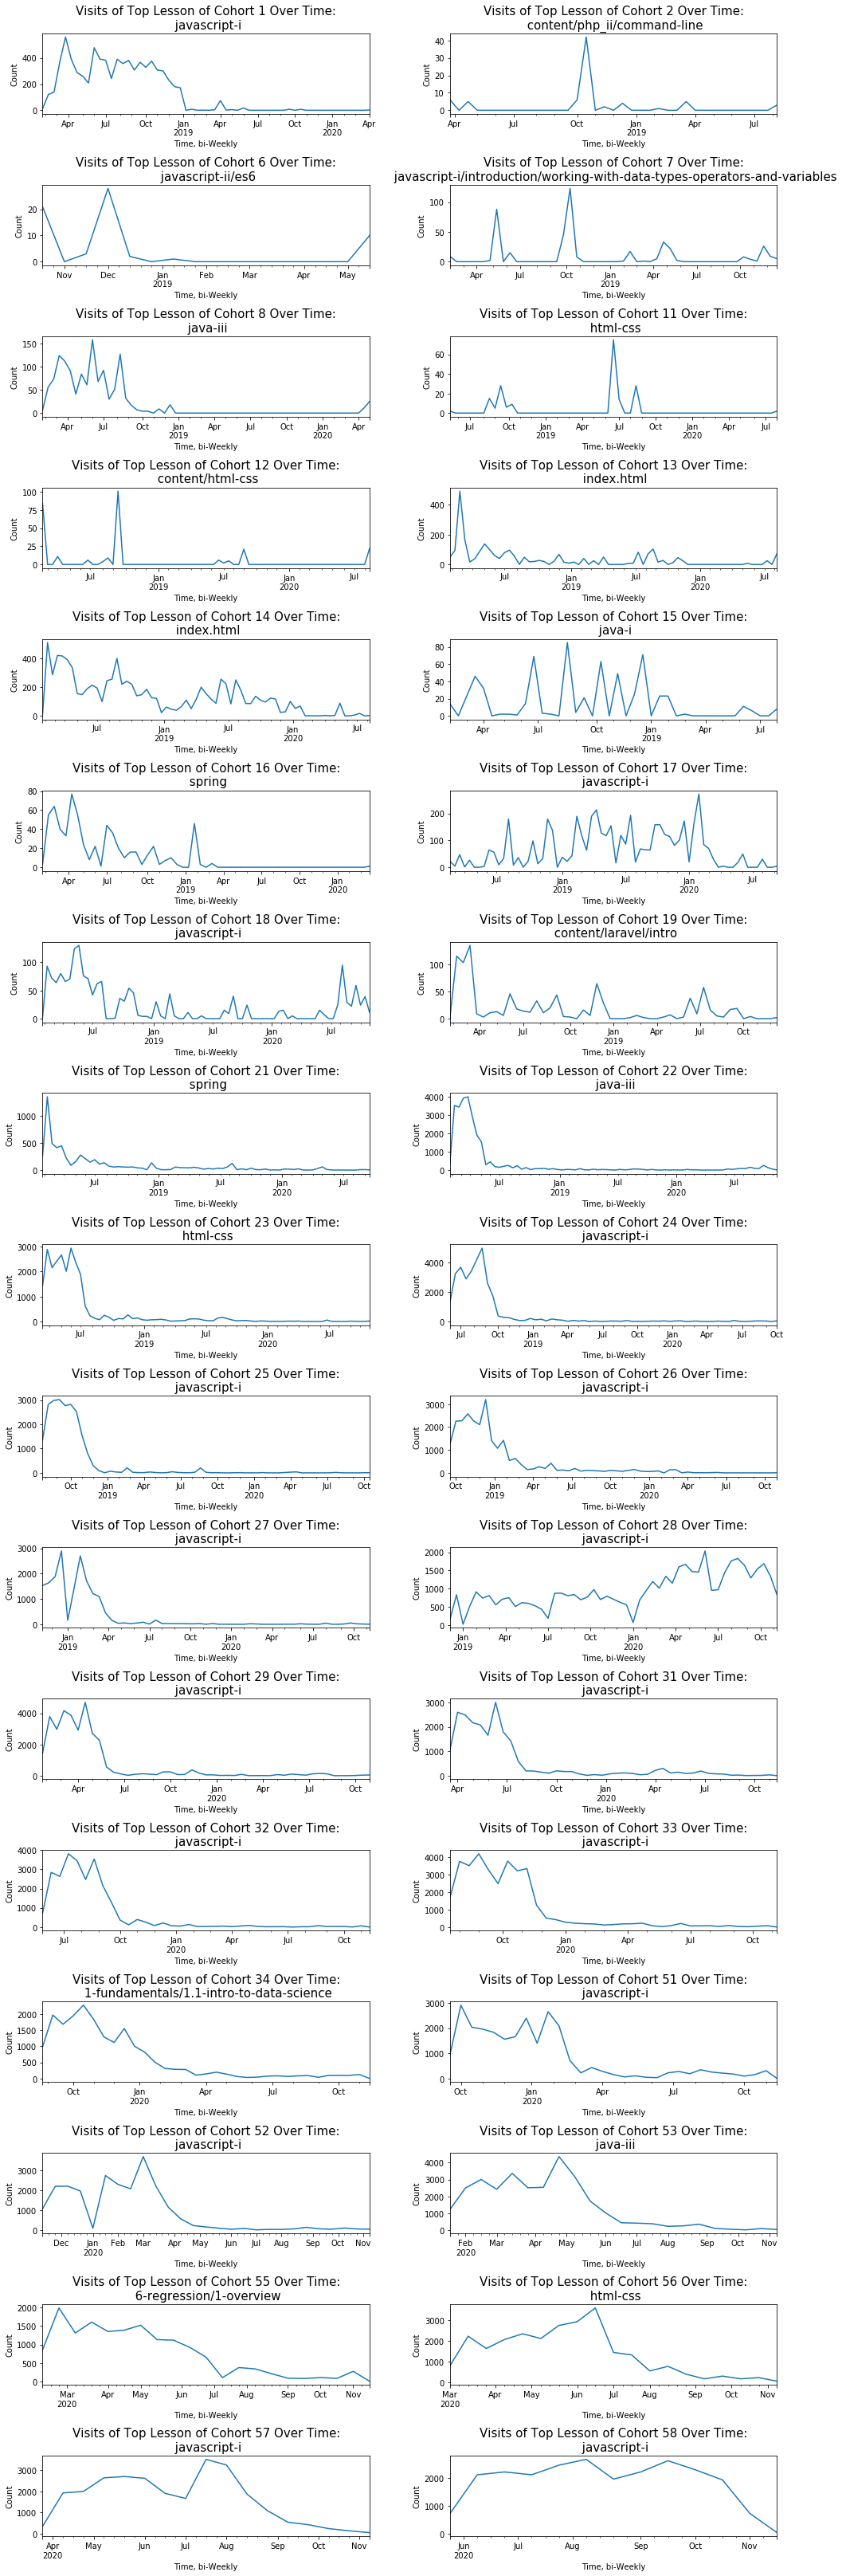

In [211]:
graduated_cohorts = list(range(1,35)) + [51,52,53,55,56,57,58]
y = 1

plt.figure(figsize=(15,45))
for x in graduated_cohorts:
    
    if df[df.cohort_id == x].shape == (0,5) or x == 4 or x == 9:
        pass
    
    else:
        plt.subplot(17,2,y)
        
        y = y + 1
        
        top_page = df[df.cohort_id == x].page_viewed.value_counts().idxmax()
        
        #plt.figure(figsize=(10,7))
        df[df.cohort_id == x].page_viewed.resample('2W').count().plot()
        plt.title(f'Visits of Top Lesson of Cohort {x} Over Time:\n {top_page}', fontsize=15)
        plt.xlabel('Time, bi-Weekly')
        plt.ylabel('Count')
        
plt.tight_layout()

##### [Back to Table of Contents](#top-bullet)

## Which lessons are least accessed? <a class="anchor" id="seventh-bullet"></a>

In [172]:
page_counts = pd.DataFrame(WD_df.page_viewed.value_counts())

# pages with only one count of views
# very long list, highlighting first 5 to upload to Github
list(page_counts[page_counts.page_viewed == 1].index)[0:5]

# run this code to see full list
# list(page_counts[page_counts.page_viewed == 1].index)

['cli/4-navigating-the-filesystem',
 'anomaly-detection/time-series-anomaly-detection-part-1',
 'stats/probability-and-event-interactions',
 '9-timeseries/6.2-prophet',
 'javascript-i/bom-and-dom/dom']

### Curriculumn from this list by Web Devlopment Users
- cli/4-navigating-the-filesystem
- javascript-i/math
- 8.0_Intro_Module
- 4-stats/1-descriptive-stats
- 6-regression/4-multivariate-regression-in-excel
- 2-sql/database-design
- 5-stats/4.2-compare-means/null
- 12-distributed-ml/spark-topics
- java-iii/servelet

In [175]:
page_counts = pd.DataFrame(DS_df.page_viewed.value_counts())

# pages with anly one count of views
list(page_counts[page_counts.page_viewed == 1].index)[0:5]

# run this code to see full list
# list(page_counts[page_counts.page_viewed == 1].index)

['5-stats/4.2-compare-means/null',
 'itc-ml',
 'imports',
 'explore',
 '6-regression/8-Project']

### Curriculumn from this list by Data Science Users
- 12-distributed-ml/spark-topics
- anomaly-detection/time-series-anomaly-detection-part-1
- 7.4.1-pandas-overview
- 2.1-spreadsheets-overview
- 4-python/pandas-lesson
- regression/least-angle-regression
- classification/handling-missing-values
- regression/ridge-regression
- advanced-topics/tidy-data

##### [Back to Table of Contents](#top-bullet)

# Final Conclusions <a class="anchor" id="eight-bullet"></a>

### Which lesson appears to attract the most traffic consistently across cohorts (per program)?
- Intro lessons gain the most page views, while they views tend to lessen as the current cohort continues
- Overview lessons are more popular when splitting views by cohort

### Is there a cohort that referred to a lesson significantly more that other cohorts seemed to gloss over?
- Web Dev 
    - lessons did not appear to influence the views by cohort. Views stayed consistent by cohort, so more active cohorts looked at lessons the same throughout and less active cohorts looked at lessons the same throughout
- Data Science
    - Curie spent significantly more time on the MySql Overview lesson
    - Darden spent significantly more time on the Classifcation Overview lesson
    - Bayes spent slighlty more time on the Intro to DS lesson

### Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
- inactivity of certain users seems to be caused by changing user ids

### Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses? Any odd user-agents?
- supsicous from china

### At some point in the last year, ability for students and alumni to cross-access curriculum (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
- Most evidence suggests cross access is from past, two users

### What topics are grads continuing to reference after graduation and into their jobs (for each program)?
- tba

### Which lessons are least accessed?
- tba